In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data import and basic info
csv_data = pd.read_csv("aug_train.csv")
hr_data = pd.DataFrame(csv_data)
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# dealing with missing data / portion
hr_data.isnull().sum() / len(hr_data)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235637
relevent_experience       0.000000
enrolled_university       0.019589
education_level           0.024052
major_discipline          0.146803
experience                0.003288
company_size              0.308169
company_type              0.318222
last_new_job              0.021750
training_hours            0.000000
target                    0.100014
dtype: float64

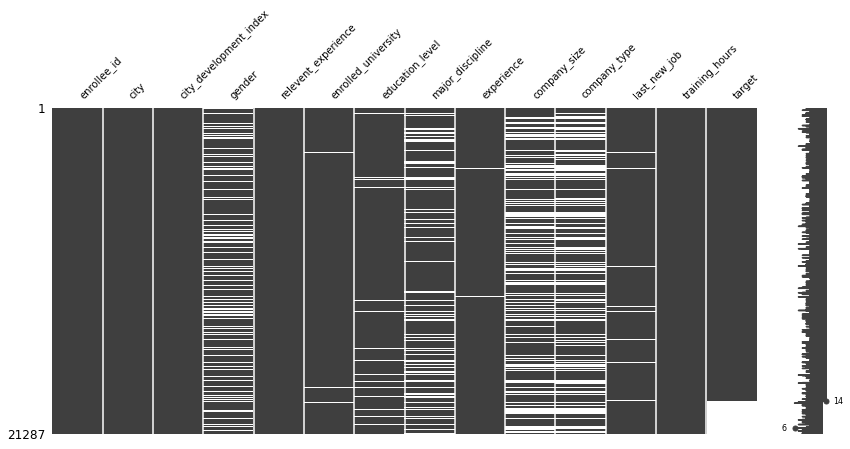

In [ ]:
# missing value matrix
import missingno as msno
msno.matrix(hr_data, figsize=(14, 6), fontsize=10)

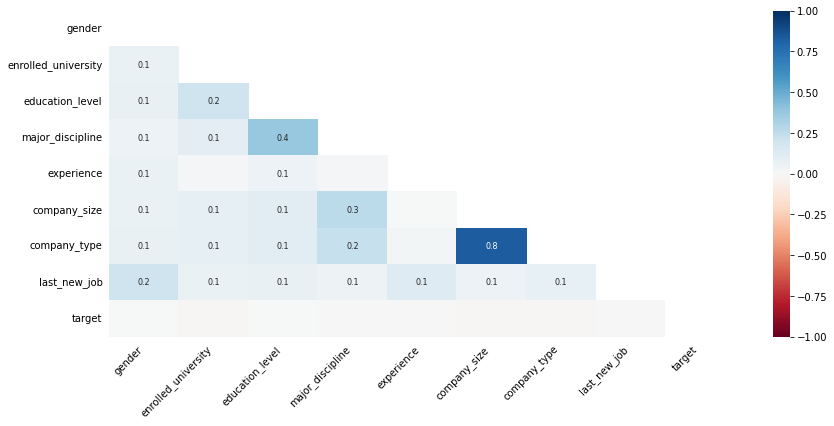

In [ ]:
# missing value heatmap
msno.heatmap(hr_data, figsize=(14, 6), fontsize=10)

In [ ]:
# fill in missing values
hr_data["experience"] = hr_data["experience"].fillna('Unknown')
hr_data["last_new_job"] = hr_data["last_new_job"].fillna('Unknown')
# calculate missing portion again
hr_data.isnull().sum() / len(hr_data)


enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235637
relevent_experience       0.000000
enrolled_university       0.019589
education_level           0.024052
major_discipline          0.146803
experience                0.000000
company_size              0.308169
company_type              0.318222
last_new_job              0.000000
training_hours            0.000000
target                    0.100014
dtype: float64

In [ ]:
hr_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [1]:
# set bins for EXPERIENCE!!!!!!
# overall countplot of "" by target

plt.figure(figsize=[15,17])
plot=["relevent_experience",  "experience", "last_new_job"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=hr_data)
    plt.text(x, y + y_max / 20, str(round(percentage[x], 2)), ha='center')
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
# set bins !!!!
# define and clean the <1 and >20 values we can do another plot
def clean_experience(df):
    for i in df["experience"]:
        if(i==">20"):
            df["experience"][df["experience"]==i]=21
        if(i == "<1"):
            df["experience"][df["experience"]==i]=0
clean_experience(hr_data)

# do the same plot again
ep = hr_data['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(hr_data)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



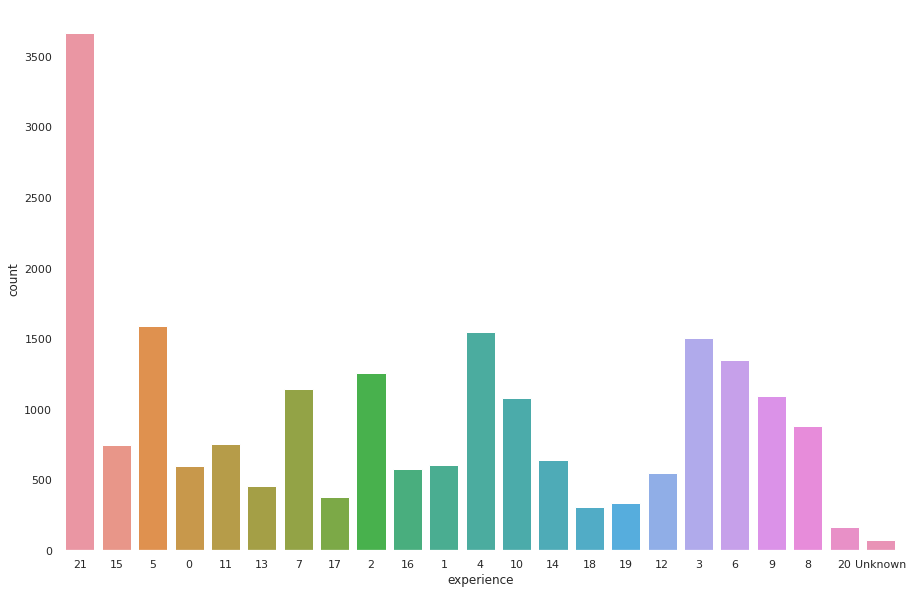

In [ ]:
# countplot of experience
plt.figure(figsize=(15,10))
sns.countplot(hr_data.experience)

In [ ]:
# initial plot of relevant_experience
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = hr_data['relevent_experience'].value_counts().reset_index()
ep.columns = [
    'relevent_experience', 
    'percent'
]
ep['percent'] /= len(hr_data)

fig = px.pie(
    ep, 
    names='relevent_experience', 
    values='percent', 
    title='Relevant_Experience', 
    width=800,
    height=500 
)

fig.show()

In [ ]:
# initial plot of last_new_jobs
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = hr_data['last_new_job'].value_counts().reset_index()
ep.columns = [
    'last_new_job', 
    'percent'
]
ep['percent'] /= len(hr_data)

fig = px.pie(
    ep, 
    names='last_new_job', 
    values='percent', 
    title='Last_new_job', 
    width=800,
    height=500 
)

fig.show()